In [1]:
import organizer_copy as org
import pickle
# from scipy.io import savemat
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

from vital_sign_radar import *


<_io.BufferedReader name='rf1_1.pkl'>
Start time:  2021-11-14T03:02:38.226589Z
End time:  2021-11-14T03:03:08.234442Z
Non monotonic packets:  []
1 packet not in order
(3599, 1, 1, 256)
(3599, 1, 1, 256)
(256,)


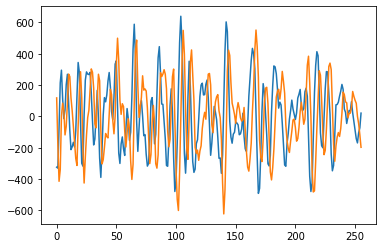

In [2]:
# file_root = "test_range_heart4"
# file_name = file_root+'.pkl'
# f = open('./' + file_name,'rb')
file_root = "rf1_1.pkl"
f = open(file_root,'rb')
print(f)
s = pickle.load(f)

N = 256
o = org.Organizer(s, 1, 1, 1, 2*N)
frames = o.organize()
orig_data = frames[:,:,:,0::2] #remove zeros
frames = orig_data#[0:1200]
# window = np.hanning(N)
# frames = frames*window


print(frames.shape)
print(orig_data.shape)

test_array = frames[0,0,0]
print(test_array.shape)
plt.plot(np.real(test_array))
plt.plot(np.imag(test_array))
plt.show()

In [3]:
# samp_f*3e8/freq_slope/2*13/256
# print(frames.shape)

13
256
1 29
Resp 2.002224654060068, heart 58.06451496774197.


/home/sasha/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sasha/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(3599,) (3599,)
Max range: 12.49750049990002 and resolution: 0.048818361327734455
Person range at: 0.6304077726121442m


BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


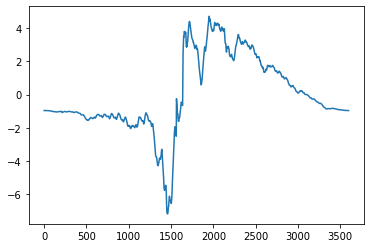

<Figure size 432x288 with 0 Axes>

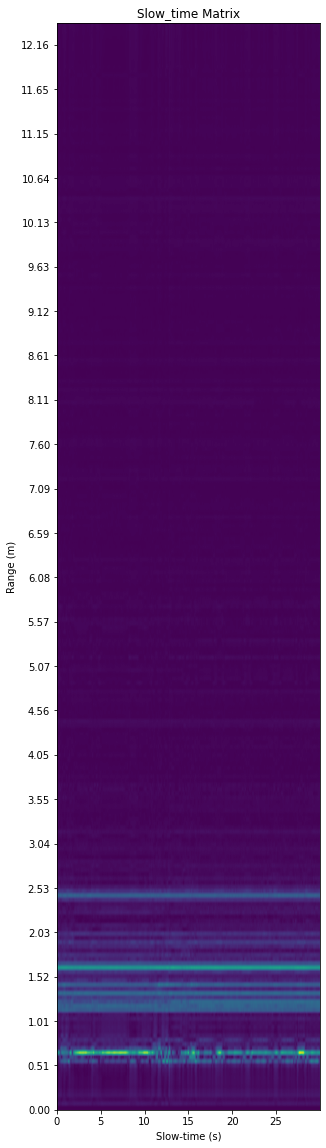

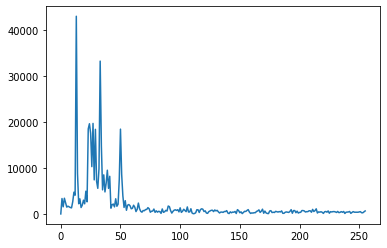

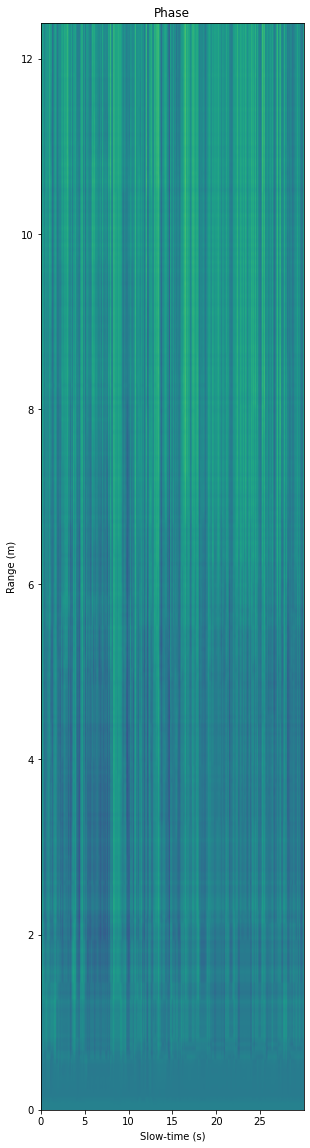

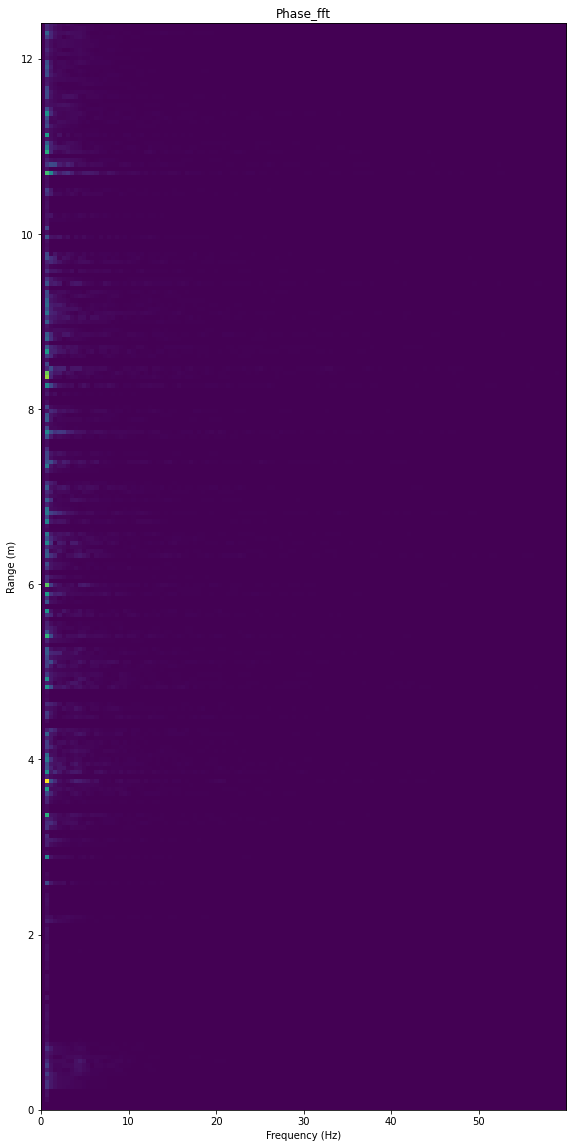

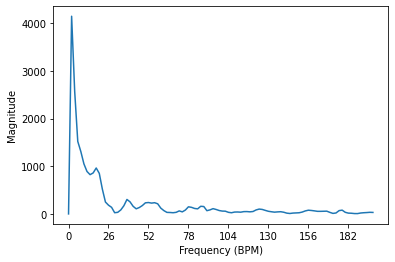

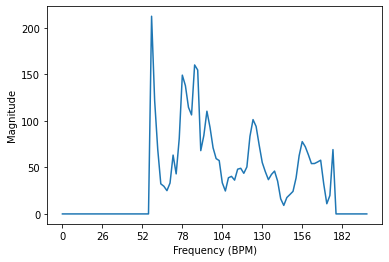

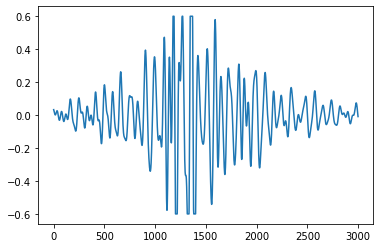

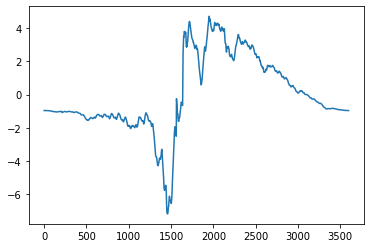

In [4]:
# (bandwidth, slope_freq Mhz/micro-sec, sampling_freq samples/second, samples/chirp, frame periodicity)
rf_params = (3.60072e9, 60.012e12, 5e6, 256, 0.0083333335)
bandwidth, freq_slope, samp_f, samples, frame_t = rf_params

aspect_ratio = 10

data_f = create_fast_slow_matrix(frames)
max_index = find_range(data_f)
phase_f = vibration_fft(data_f, range=max_index)

print(max_index)
plt.figure()
# plt.plot(phase_f[:,max_index])
display_fast_slow_matrix(data_f, rf_params)
plot_vibrations(data_f)
plot_vibrations_fft(phase_f)
heart_wave, resp_wave = plot_vitals(phase_f, max_index)

print("Max range: {} and resolution: {}".format(samp_f*(3e8)/2/freq_slope, samp_f*(3e8)/2/samples/freq_slope))
print("Person range at: {}m".format(max_index * samp_f * 2.98e8 / 2 / freq_slope/samples))

import heartpy as hp

working_data, measures = hp.process(hp.scale_data(heart_wave), 120.0)
hp.plotter(working_data, measures)

In [ ]:
seconds = 12
for i in range(17):
    frames = orig_data[int(i/frame_t):int(seconds/frame_t + (i)/frame_t),:,:,::2]
    data_f = create_fast_slow_matrix(frames)
    max_index = find_range(data_f)
    phase_f = vibration_fft(data_f)
    plot_vitals(phase_f, max_index)